In [15]:
from pathlib import Path
import os
import pprint as pp
import cv2 as cv
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage.metrics import structural_similarity as ssim
%matplotlib inline


In [2]:
# Load a model
model = YOLO('yolov8n-seg.pt')


In [3]:
def calculate_ssim_similarity(img1, img2):
    # Convert images to grayscale
    img1_gray = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)
    img2_gray = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)

    # Compute Structural Similarity Index (SSI)
    similarity_index, _ = ssim(img1_gray, img2_gray, full=True)

    return similarity_index

In [4]:
def vehicle_seg(img_arr):
    # image = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
    target_classes = ['car', 'truck', 'bus', 'motorcycle', 'bicycle']

    
    result = model.predict(img_arr)
    
    for r in result:
        img = np.copy(r.orig_img)
        img_name = Path(r.path).stem # source image base-name

        # Iterate each object contour (multiple detections)
        for ci,c in enumerate(r):
            class_detected=json.loads(c.tojson())[0]['name']
            if class_detected in target_classes:
                label = c.names[c.boxes.cls.tolist().pop()]    
                b_mask = np.zeros(img.shape[:2], np.uint8)

                #  Extract contour result
                contour = c.masks.xy.pop()
                #  Changing the type
                contour = contour.astype(np.int32)
                #  Reshaping
                contour = contour.reshape(-1, 1, 2)


                # Draw contour onto mask
                _ = cv.drawContours(b_mask,
                                    [contour],
                                    -1,
                                    (255, 255, 255),
                                    cv.FILLED)

                    # Create 3-channel mask
                mask3ch = cv.cvtColor(b_mask, cv.COLOR_BGR2RGB)

                # Isolate object with binary mask
                isolated = cv.bitwise_and(mask3ch, img)
                # fig, ax = plt.subplots(1,2,figsize=(12,8))    
                # ax[0].imshow(img_arr)
                # ax[1].imshow(isolated)
                return image_arr,isolated
    

In [5]:
def vehicle_seg_2(image_arr):
    target_classes = [2,3,4,5,6,7]
    result = model.predict(image_arr)
    cont=[]
    
    img = np.copy(result[0].orig_img)
    img_name = Path(result[0].path).stem # source image base-name
    b_mask = np.zeros(img.shape[:2], np.uint8)
    
    for r in result:
        for ci,c in enumerate(r):
            if c.boxes.cls in target_classes:
                

                #  Extract contour result
                contour = c.masks.xy.pop()
                #  Changing the type
                contour = contour.astype(np.int32)
                #  Reshaping
                contour = contour.reshape(-1, 1, 2)
                # print(contour.shape)

                cont.append(contour)

    for a in cont:
        _ = cv.drawContours(b_mask, [a], -1, (255, 255, 255), cv.FILLED)

    mask3ch = cv.cvtColor(b_mask, cv.COLOR_BGR2RGB)

    # Isolate object with binary mask
    isolated = cv.bitwise_and(mask3ch, img)
    # fig, ax = plt.subplots(1,2,figsize=(12,8))    
    # ax[0].imshow(image_arr)
    # ax[1].imshow(isolated)
    return image_arr,isolated

In [6]:
def vehicle_seg_seperate(image_arr):
    target_classes = [2,3,4,5,6,7]
    result = model.predict(image_arr)
    
    img = np.copy(result[0].orig_img)
    img_name = Path(result[0].path).stem # source image base-name
    
    
    for r in result:
        for ci,c in enumerate(r):
            if c.boxes.cls in target_classes:
                b_mask = np.zeros(img.shape[:2], np.uint8)
                
                #  Extract contour result
                contour = c.masks.xy.pop()
                #  Changing the type
                contour = contour.astype(np.int32)
                #  Reshaping
                contour = contour.reshape(-1, 1, 2)
        
                _ = cv.drawContours(b_mask, [contour], -1, (255, 255, 255), cv.FILLED)

                mask3ch = cv.cvtColor(b_mask, cv.COLOR_BGR2RGB)

                # Isolate object with binary mask
                isolated = cv.bitwise_and(mask3ch, img)
                fig, ax = plt.subplots(1,2,figsize=(12,8))    
                ax[0].imshow(image_arr)
                ax[1].imshow(isolated)
                # return image_arr,isolated

# target_classes = [2,3,4,5,6,7]
# result = model.predict(image_arr)

# img = np.copy(result[0].orig_img)
# img_name = Path(result[0].path).stem # source image base-name



# for r in result:
#     for ci,c in enumerate(r):
#         if c.boxes.cls in target_classes:
#             b_mask = np.zeros(img.shape[:2], np.uint8)

#             #  Extract contour result
#             # print(c.masks.xy[0].shape)
#             contour = c.masks.xy.pop()
#              #  Changing the type
#             contour = contour.astype(np.int32)
#              #  Reshaping
#             contour = contour.reshape(-1, 1, 2)
#             # print(contour)


#              # Draw contour onto mask
#             _ = cv.drawContours(b_mask,
#                                 [contour],
#                                 -1,
#                                 (255, 255, 255),
#                                 cv.FILLED)

#             # Create 3-channel mask
#             mask3ch = cv.cvtColor(b_mask, cv.COLOR_BGR2RGB)

#             # Isolate object with binary mask
#             isolated = cv.bitwise_and(mask3ch, img)
#             fig, ax = plt.subplots(1,2,figsize=(12,8))    
#             ax[0].imshow(image_arr)
#             ax[1].imshow(isolated)
            # return image_arr,isolated


0: 384x640 1 truck, 69.0ms
Speed: 2.5ms preprocess, 69.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


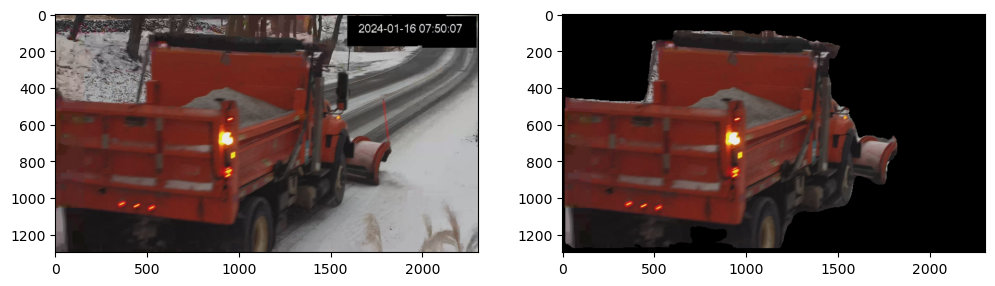

In [7]:
image1 = 'tt4.jpg'
image_arr=cv.cvtColor(cv.imread(image1), cv.COLOR_BGR2RGB)
orig_image,segmented_image=vehicle_seg_2(image_arr)
fig, ax = plt.subplots(1,2,figsize=(12,8))    
ax[0].imshow(orig_image)
ax[1].imshow(segmented_image)


0: 480x640 1 car, 90.7ms
Speed: 2.6ms preprocess, 90.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 384x640 1 car, 1 truck, 59.0ms
Speed: 1.3ms preprocess, 59.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 car, 65.2ms
Speed: 1.4ms preprocess, 65.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 480x640 1 car, 67.3ms
Speed: 1.9ms preprocess, 67.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 384x640 2 cars, 1 bus, 54.1ms
Speed: 1.4ms preprocess, 54.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 480x640 1 car, 67.5ms
Speed: 1.6ms preprocess, 67.5ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


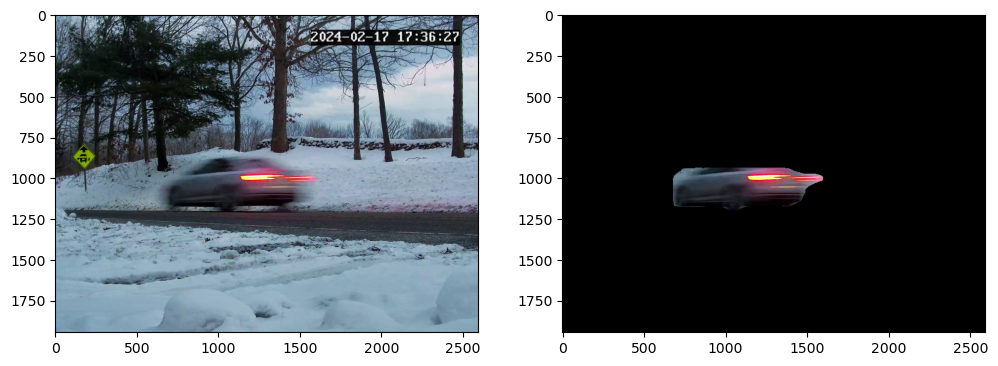

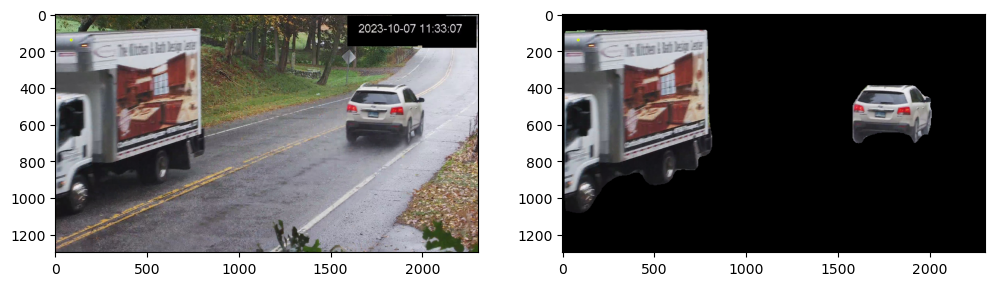

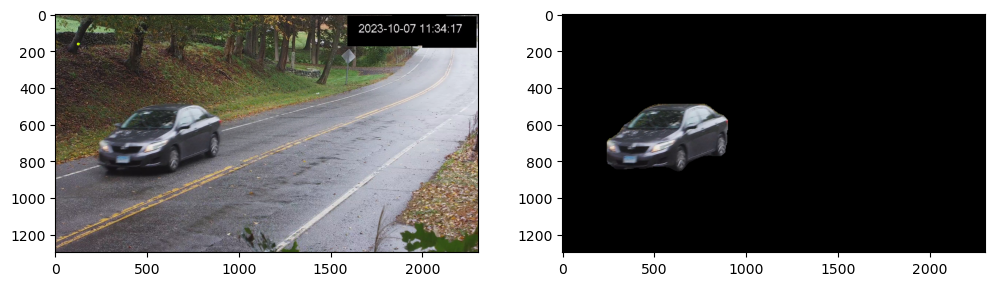

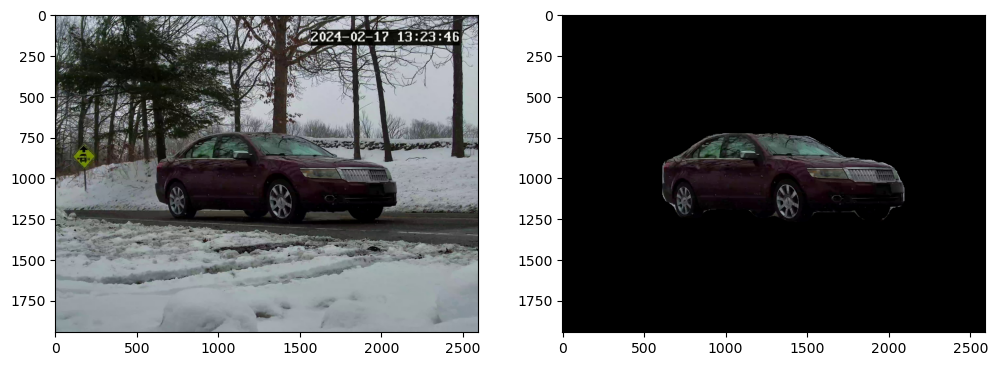

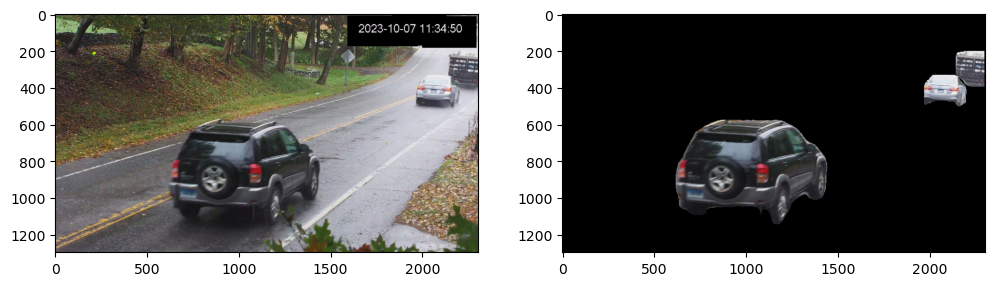

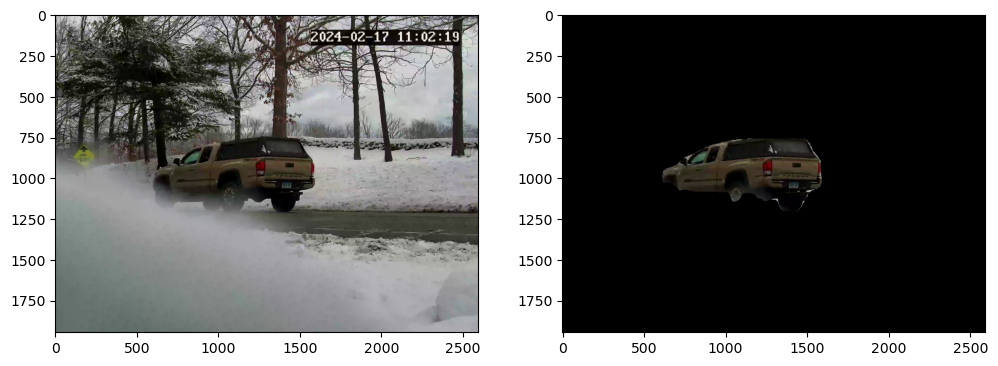

In [8]:
random_images_path='random_images'
images_list=os.listdir(random_images_path)

output_folder='random_images/masked_images'
os.makedirs(output_folder, exist_ok=True)

n=0
for img in images_list:
    img_path=os.path.join(random_images_path,img)
    image_arr=cv.cvtColor(cv.imread(img_path), cv.COLOR_BGR2RGB)
    orig_image,segmented_image=vehicle_seg_2(image_arr)
    
    segmented_image_path = os.path.join(output_folder, f'segmented_{img}')
    cv.imwrite(segmented_image_path, cv.cvtColor(segmented_image, cv.COLOR_RGB2BGR))
    
    fig, ax = plt.subplots(1,2,figsize=(12,8))    
    ax[0].imshow(orig_image)
    ax[1].imshow(segmented_image)
    n+=1
    if n>5:
        break
    



19 1584 1.0
32 1584 2.0
42 1584 3.0
15 1584 1.0
42 1584 3.0
40 1584 3.0
11 541 2.0
11 541 2.0
15 541 3.0
7 541 1.0
10 541 2.0
15 541 3.0
27 1225 2.0
14 1225 1.0
52 1225 4.0
16 1225 1.0
22 1225 2.0
52 1225 4.0
10 94 11.0
6 94 6.0
4 94 4.0
0 94 0.0
5 94 5.0
94 94 100.0


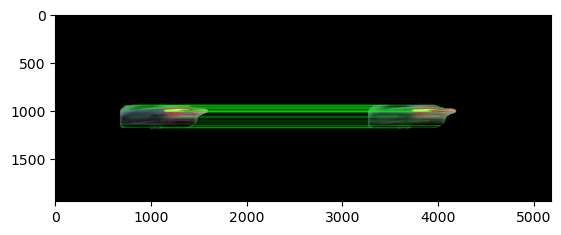

38 1561 2.0
14 1561 1.0
12 1561 1.0
41 1561 3.0
32 1561 2.0
42 1561 3.0
8 452 2.0
7 452 2.0
4 452 1.0
12 452 3.0
12 452 3.0
12 452 3.0
9 94 10.0
6 94 6.0
4 94 4.0
94 94 100.0


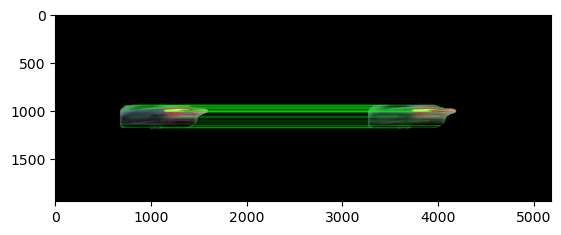

1 94 1.0
5 94 5.0


In [18]:
masked_images_path='random_images/masked_images'
masked_images_list=os.listdir(masked_images_path)
txt='.jpg'

keypoints=[]

sift = cv.SIFT_create()

for img in masked_images_list:
    img_keypoints={}
    if txt in img:
        img1_path=os.path.join(masked_images_path,img)
        img1=cv.cvtColor(cv.imread(img1_path), cv.COLOR_BGR2RGB)
        kp1, des1 = sift.detectAndCompute(img1,None)
        for kp,des in zip(kp1,des1):
            img_keypoints[img]={}
            img_keypoints[img]['Descriptor']=des
            img_keypoints[img]['Keypoint']=kp.pt
            img_keypoints[img]['Size']=kp.size
            img_keypoints[img]['Angle']=kp.angle
            img_keypoints[img]['Response']=kp.response
            img_keypoints[img]['Octave']=kp.octave
            img_keypoints[img]['ClassID']=kp.class_id
            keypoints.append(img_keypoints)
            
        for img_to_match in masked_images_list:
            
            if (txt in img_to_match) and (img != img_to_match):
                
                img2_path=os.path.join(masked_images_path,img_to_match)
                img2=cv.cvtColor(cv.imread(img2_path), cv.COLOR_BGR2RGB)
                
                
                kp2, des2 = sift.detectAndCompute(img2,None)
                
                FLANN_INDEX_KDTREE = 1
                index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
                search_params = dict(checks=50)   # or pass empty dictionary
                flann = cv.FlannBasedMatcher(index_params,search_params)
                matches = flann.knnMatch(des1,des2,k=2)
                
                matchesMask = [[0,0] for i in range(len(matches))]
                
                for i,(m,n) in enumerate(matches):
                    if m.distance < 0.7*n.distance:
                        matchesMask[i]=[1,0]
                
                # print(matchesMask)
                # Count occurrences of [1, 0]
                count_of_matchedmasks = sum(1 for sublist in matchesMask if sublist == [1, 0])
                percentage_mask= round((count_of_matchedmasks/(len(matchesMask)))*100,0)
                print(count_of_matchedmasks,len(matchesMask),percentage_mask)
                if percentage_mask>50:
                    draw_params = dict(matchColor = (0,255,0),
                    singlePointColor = (255,0,0),
                    matchesMask = matchesMask,
                    flags = cv.DrawMatchesFlags_DEFAULT)
                    img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
                    plt.imshow(img3,),plt.show()
                
                
                
                
                
                
            
                
                
                
        

17 1584 1.0
29 1584 2.0
42 1584 3.0
17 1584 1.0
42 1584 3.0
40 1584 3.0
11 541 2.0
11 541 2.0
15 541 3.0
9 541 2.0
9 541 2.0
15 541 3.0
27 1225 2.0
14 1225 1.0
51 1225 4.0
14 1225 1.0
24 1225 2.0
52 1225 4.0
9 94 10.0
6 94 6.0
4 94 4.0
0 94 0.0
5 94 5.0
94 94 100.0


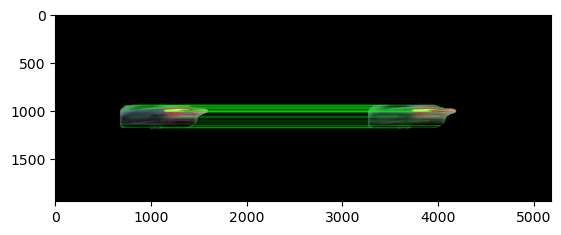

42 1561 3.0
13 1561 1.0
11 1561 1.0
42 1561 3.0
34 1561 2.0
41 1561 3.0
7 452 2.0
8 452 2.0
5 452 1.0
12 452 3.0
16 452 4.0
12 452 3.0
9 94 10.0
7 94 7.0
4 94 4.0
94 94 100.0


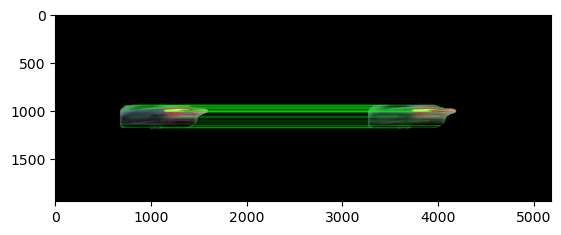

0 94 0.0
5 94 5.0


In [23]:
masked_images_path='random_images/masked_images'
masked_images_list=os.listdir(masked_images_path)
txt='.jpg'

keypoints=[]

sift = cv.SIFT_create()
for img in masked_images_list:
    img_keypoints={}
    if txt in img:
        img1_path=os.path.join(masked_images_path,img)
        img1=cv.cvtColor(cv.imread(img1_path), cv.COLOR_BGR2RGB)
        kp1, des1 = sift.detectAndCompute(img1,None)
        for kp,des in zip(kp1,des1):
            img_keypoints['image']=img
            img_keypoints['Descriptor']=des
            img_keypoints['Keypoint']=kp.pt
            img_keypoints['Size']=kp.size
            img_keypoints['Angle']=kp.angle
            img_keypoints['Response']=kp.response
            img_keypoints['Octave']=kp.octave
            img_keypoints['ClassID']=kp.class_id
            keypoints.append(img_keypoints)
            
        for img_to_match in masked_images_list:
            
            if (txt in img_to_match) and (img != img_to_match):
                
                img2_path=os.path.join(masked_images_path,img_to_match)
                img2=cv.cvtColor(cv.imread(img2_path), cv.COLOR_BGR2RGB)
                
                
                kp2, des2 = sift.detectAndCompute(img2,None)
                
                FLANN_INDEX_KDTREE = 1
                index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
                search_params = dict(checks=50)   # or pass empty dictionary
                flann = cv.FlannBasedMatcher(index_params,search_params)
                matches = flann.knnMatch(des1,des2,k=2)
                
                matchesMask = [[0,0] for i in range(len(matches))]
                
                for i,(m,n) in enumerate(matches):
                    if m.distance < 0.7*n.distance:
                        matchesMask[i]=[1,0]
                
                # print(matchesMask)
                # Count occurrences of [1, 0]
                count_of_matchedmasks = sum(1 for sublist in matchesMask if sublist == [1, 0])
                percentage_mask= round((count_of_matchedmasks/(len(matchesMask)))*100,0)
                print(count_of_matchedmasks,len(matchesMask),percentage_mask)
                if percentage_mask>50:
                    draw_params = dict(matchColor = (0,255,0),
                    singlePointColor = (255,0,0),
                    matchesMask = matchesMask,
                    flags = cv.DrawMatchesFlags_DEFAULT)
                    img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
                    plt.imshow(img3,),plt.show()
                

In [20]:
keypoints[1]['Descriptor']

array([          9,           0,           0,           0,           0,           0,           0,           2,         150,           0,           0,           0,           1,           1,           0,          64,         108,           1,           0,           8,         104,          21,           1,          32,
                 6,           0,           0,           3,          39,          17,           9,          23,          25,           1,           0,           0,           0,           0,           0,           4,         150,          21,           0,           0,           4,           2,           0,          67,
               106,          10,           0,           0,         122,          46,           9,          27,           5,           0,           0,           0,          30,          21,          29,          68,          17,           5,           0,           0,           0,           0,           0,           0,
               150,         150,           

In [26]:
import numpy as np

# Define a function to compute Euclidean distance between two SIFT descriptors
def sift_distance(descriptor1, descriptor2):
    return np.linalg.norm(descriptor1 - descriptor2)

# List of dictionaries containing SIFT components for each image
sift_components = [
    {'Descriptor': keypoints[24]['Descriptor'], 'image': 'segmented_111501_1527.jpg'},
    {'Descriptor': keypoints[25]['Descriptor'], 'image': 'segmented_111501_534.jpg'},
    # Add more SIFT components here...
]

# Compute pairwise distances and aggregate to obtain similarity scores
similarity_scores = {}
for i, sift_i in enumerate(sift_components):
    for j, sift_j in enumerate(sift_components):
        if i != j:  # Avoid comparing the same image
            distance = sift_distance(sift_i['Descriptor'], sift_j['Descriptor'])
            similarity_scores[(sift_i['image'], sift_j['image'])] = distance

print(similarity_scores)


{('segmented_111501_1527.jpg', 'segmented_111501_534.jpg'): 0.0, ('segmented_111501_534.jpg', 'segmented_111501_1527.jpg'): 0.0}


In [16]:
keypoint_tuples = [tuple(d.items()) for d in keypoints]

# Remove duplicate tuples
unique_tuples = list(set(keypoint_tuples))

# Convert unique tuples back to dictionaries
unique_dicts = [dict(t) for t in unique_tuples]

pp.pprint(unique_dicts)

[{'Angle': 187.45321655273438,
  'ClassID': -1,
  'Descriptor': 2528.0,
  'Keypoint': (939.2396240234375, 642.9312744140625),
  'Octave': 1245700,
  'Response': 0.018070820719003677,
  'Size': 73.6341323852539,
  'image': 'segmented_111501_1527.jpg'},
 {'Angle': 172.20274353027344,
  'ClassID': -1,
  'Descriptor': 2695.0,
  'Keypoint': (2010.8414306640625, 523.7127685546875),
  'Octave': 14222335,
  'Response': 0.06779984384775162,
  'Size': 3.471466541290283,
  'image': 'segmented_111501_534.jpg'},
 {'Angle': 173.801025390625,
  'ClassID': -1,
  'Descriptor': 2289.0,
  'Keypoint': (1597.7108154296875, 997.368896484375),
  'Octave': 13566975,
  'Response': 0.05304110795259476,
  'Size': 3.4377477169036865,
  'image': 'segmented_173627_17797.jpg'},
 {'Angle': 167.74375915527344,
  'ClassID': -1,
  'Descriptor': 2687.0,
  'Keypoint': (2095.26953125, 1062.2615966796875),
  'Octave': 8454400,
  'Response': 0.06137292832136154,
  'Size': 4.036332607269287,
  'image': 'segmented_132345_14993

In [11]:
import numpy as np

# Define a function to compute Euclidean distance between two SIFT descriptors
def sift_distance(descriptor1, descriptor2):
    return np.linalg.norm(descriptor1 - descriptor2)

# List of dictionaries containing SIFT components for each image
sift_components = [
    {'Descriptor': np.array([2528.0, ...]), 'image': 'segmented_111501_1527.jpg'},
    {'Descriptor': np.array([2695.0, ...]), 'image': 'segmented_111501_534.jpg'},
    # Add more SIFT components here...
]

# Compute pairwise distances and aggregate to obtain similarity scores
similarity_scores = {}
for i, sift_i in enumerate(sift_components):
    for j, sift_j in enumerate(sift_components):
        if i != j:  # Avoid comparing the same image
            distance = sift_distance(sift_i['Descriptor'], sift_j['Descriptor'])
            similarity_scores[(sift_i['image'], sift_j['image'])] = distance

# Optionally normalize similarity scores if needed
# normalized_similarity_scores = ...

# Print or use similarity scores as needed
print(similarity_scores)


[{'image': 'segmented_111501_534.jpg',
  'Descriptor': array([          9,           0,           0,           0,           0,           0,           0,           2,         150,           0,           0,           0,           1,           1,           0,          64,         108,           1,           0,           8,         104,          21,           1,          32,
                   6,           0,           0,           3,          39,          17,           9,          23,          25,           1,           0,           0,           0,           0,           0,           4,         150,          21,           0,           0,           4,           2,           0,          67,
                 106,          10,           0,           0,         122,          46,           9,          27,           5,           0,           0,           0,          30,          21,          29,          68,          17,           5,           0,           0,           0,           0,           

In [17]:
keypoints[0]['Descriptor']

2695.0

In [19]:
import json

features_file_path = "features.txt"

# Write list of dictionaries to a text file
with open(features_file_path, 'w') as file:
    json.dump(keypoints, file)

TypeError: Object of type ndarray is not JSON serializable

In [127]:
similarity = calculate_ssim_similarity(orig_image, segmented_image)
print(similarity)

0.5521939655823848



0: 384x640 1 truck, 85.8ms
Speed: 4.6ms preprocess, 85.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


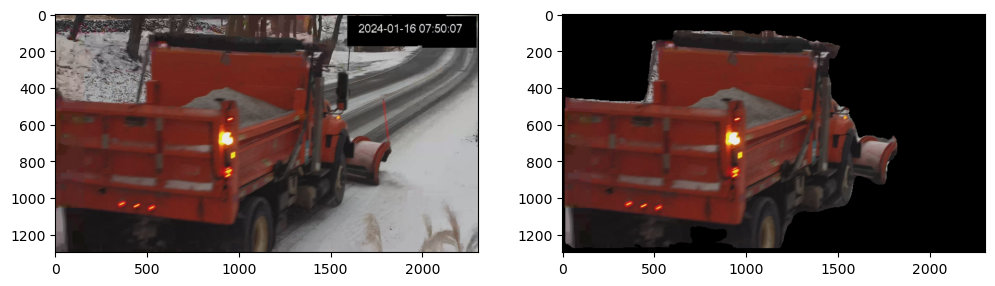

In [344]:
image2 = 'tt4.jpg'
image_arr=cv.cvtColor(cv.imread(image2), cv.COLOR_BGR2RGB)
orig_image_2,segmented_image_2=vehicle_seg_2(image_arr)
fig, ax = plt.subplots(1,2,figsize=(12,8))    
ax[0].imshow(orig_image_2)
ax[1].imshow(segmented_image_2)

589


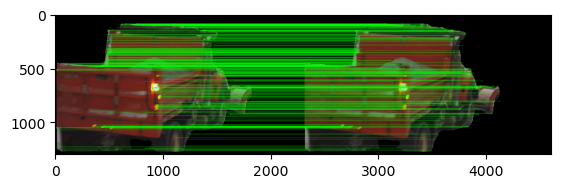

(<matplotlib.image.AxesImage at 0x2a0dc7ad0>, None)

In [333]:

# img1 = cv.cvtColor(cv.imread('tt2.jpg'), cv.COLOR_BGR2RGB)         # queryImage
# img2 = cv.cvtColor(cv.imread('tt3.jpg'), cv.COLOR_BGR2RGB)

img1=segmented_image
img2=segmented_image_2

if img1 is None:
    print("Yes")
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
print(len(matches))
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
# fig = figsize=(12,8)
plt.imshow(img3,),plt.show()

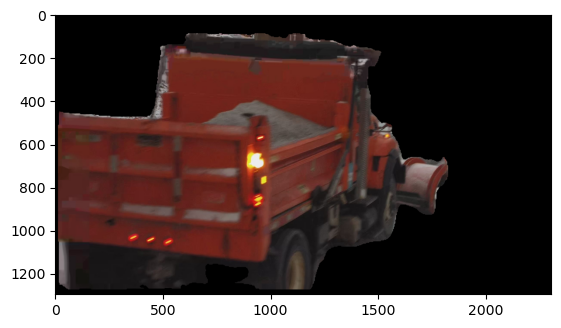

In [349]:
img1=segmented_image
img2=segmented_image_2

sift = cv.SIFT_create()
plt.imshow(img2)
plt.show()

In [353]:
kp1, des1 = sift.detectAndCompute(img2,None)

In [357]:
for kp,des in zip(kp1,des1):
    print("\n")
    print("Descriptor:",des)
    print("Keypoint:",kp.pt)
    print("Size:",kp.size)
    print("Angle:",kp.angle)
    print("Response:",kp.response)
    print("Octave:",kp.octave)
    print("ClassID:",kp.class_id)
    



Descriptor: [          7           0           0           0           0           0           0           0         167          12           0           0           0           0           0          17         123           9           0           0           0           0          26          64           1           0
           0           0           0          11          83           9           4           1           0           0           0           0           0           0         157          65           0           0           0           0           0           2         172          54           0           0
           0           0          18          67          15           0           0           0           0          19         106          35           1           0           0           0           0           0           0           0         172           7           0           0           0           0
           0           8         172           